In [1]:
import os
import django
from django.db import connection
import sys
sys.path.append('../')
import pandas as pd
import matplotlib.pyplot as plt
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'activity_viewer.settings')
django.setup()

In [2]:
from dashboard.models import Log
from django.db.models import Count

In [3]:
# A non-None error code represents an invalid request
bad_request_logs = Log.objects.filter(error_code__isnull=False)
# Grouping by error code and counting the ones that appear most, sorting by frequency
most_common_errors = bad_request_logs.values_list('error_code').annotate(count=Count('error_code')).order_by('-count')
print(most_common_errors)

<QuerySet [('InvalidRange', 208), ('NoSuchKey', 3), ('ExpiredToken', 1), ('InternalError', 1)]>


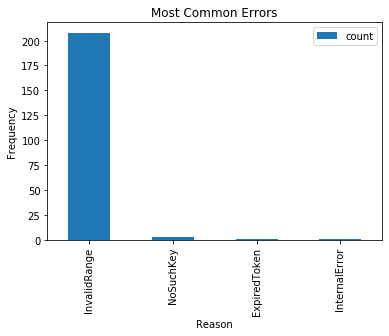

In [4]:
all_errors_df = pd.DataFrame(most_common_errors, columns=['reason', 'count'])
all_errors_df.set_index('reason', inplace=True)
axes = all_errors_df.plot(kind='bar')
axes.set(xlabel="Reason", ylabel="Frequency", title='Most Common Errors')
plt.show()

In [5]:
# Search based on a specific value of a field, in this case an IP
china_ip_errors = bad_request_logs.filter(ip_address='202.118.228.188').values_list('error_code').annotate(count=Count('error_code')).order_by('-count')
print(china_ip_errors)

<QuerySet []>


In [6]:
print(connection.queries)

[{'sql': 'SELECT "dashboard_log"."error_code", COUNT("dashboard_log"."error_code") AS "count" FROM "dashboard_log" WHERE "dashboard_log"."error_code" IS NOT NULL GROUP BY "dashboard_log"."error_code" ORDER BY "count" DESC  LIMIT 21', 'time': '0.003'}, {'sql': 'SELECT "dashboard_log"."error_code", COUNT("dashboard_log"."error_code") AS "count" FROM "dashboard_log" WHERE "dashboard_log"."error_code" IS NOT NULL GROUP BY "dashboard_log"."error_code" ORDER BY "count" DESC', 'time': '0.001'}, {'sql': 'SELECT "dashboard_log"."error_code", COUNT("dashboard_log"."error_code") AS "count" FROM "dashboard_log" WHERE ("dashboard_log"."error_code" IS NOT NULL AND "dashboard_log"."ip_address" = \'202.118.228.188\'::inet) GROUP BY "dashboard_log"."error_code" ORDER BY "count" DESC  LIMIT 21', 'time': '0.003'}]
